### A Guide to Time Series Visualization with Python 3
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

We’ll be working with a dataset called “Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.,” which collected CO2 samples from March 1958 to December 2001.

In [3]:
data = sm.datasets.co2.load_pandas()
co2_df = data.data
co2_df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


Basic principal to work with time series dataset is to ensure dates are as index

In [5]:
co2_df.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

The dtype=datetime[ns] field confirms that our index is made of date stamp objects, while length=2284 and freq='W-SAT' tells us that we have 2,284 weekly date stamps starting on Saturdays.

Weekly data can be tricky to work with, so let’s use the monthly averages of our time-series instead. This can be obtained by using the convenient resample function, which allows us to group the time-series into buckets (1 month), apply a function on each group (mean), and combine the result (one row per group).

In [6]:
# resample and buckting monthly with average mean
y = co2_df['co2'].resample('MS').mean()
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [7]:
# handle missing values
y.isnull().sum()

5

For simplicity, we can fill in missing values with the closest non-null value in our time series

In [9]:
y.fillna(y.bfill(), inplace=True)
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

#### Visualize time-series data

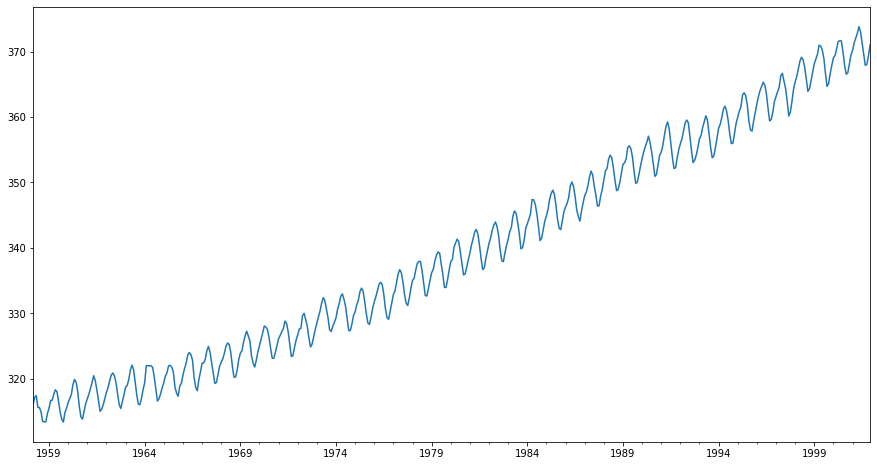

In [11]:
y.plot(figsize=(15,8))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has an obvious seasonality pattern, as well as an overall increasing trend. We can also visualize our data using a method called time-series decomposition. As its name suggests, time series decomposition allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

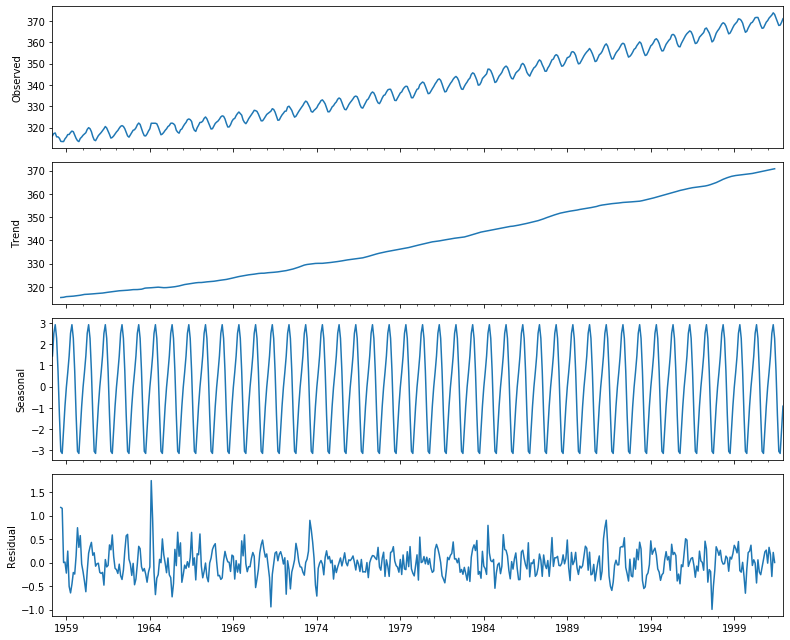

In [13]:
# to ensure decomposed plot is large enoung to see as by default statsmodel tsa libraries 
# seasonal_decompose method give output in a small window

from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows the upwards trend of our data, along with its yearly seasonality. These can be used to understand the structure of our time-series.

### Working with another dataset

To further improve your skill set, you can load in another dataset and repeat all the steps in this tutorial. For example, you may wish to read a CSV file using the pandas library or use the sunspots dataset that comes pre-loaded with the statsmodels library: `data = sm.datasets.sunspots.load_pandas().data`

In [65]:
sunspots_df = sm.datasets.sunspots.load_pandas().data
sunspots_df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [66]:
sunspots_df.index

RangeIndex(start=0, stop=309, step=1)

In [67]:
sunspots_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         309 non-null    float64
 1   SUNACTIVITY  309 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


In [62]:
# change the data type for YRER column to datetime
#sunspots_df['YEAR']=pd.to_datetime(sunspots_df['YEAR'])
#sunspots_df.info()

In [69]:
sunspots_df['YEAR']=pd.to_datetime(sunspots_df['YEAR'], format='%Y')
sunspots_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YEAR         309 non-null    datetime64[ns]
 1   SUNACTIVITY  309 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


In [70]:
# indexing with year 
y = sunspots_df.set_index('YEAR')
y.index

DatetimeIndex(['1700-01-01', '1701-01-01', '1702-01-01', '1703-01-01',
               '1704-01-01', '1705-01-01', '1706-01-01', '1707-01-01',
               '1708-01-01', '1709-01-01',
               ...
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01'],
              dtype='datetime64[ns]', name='YEAR', length=309, freq=None)

In [71]:
y.head()

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


In [73]:
# sun activity between 1990 - 1995
y['1990':'1995']

,SUNACTIVITY
YEAR,
1990-01-01,142.6
1991-01-01,145.7
1992-01-01,94.3
1993-01-01,54.6
1994-01-01,29.9
1995-01-01,17.5


In [74]:
# max year 
y.index.max()

Timestamp('2008-01-01 00:00:00')

In [75]:
# check missing value
y.isnull().sum()

SUNACTIVITY    0
dtype: int64

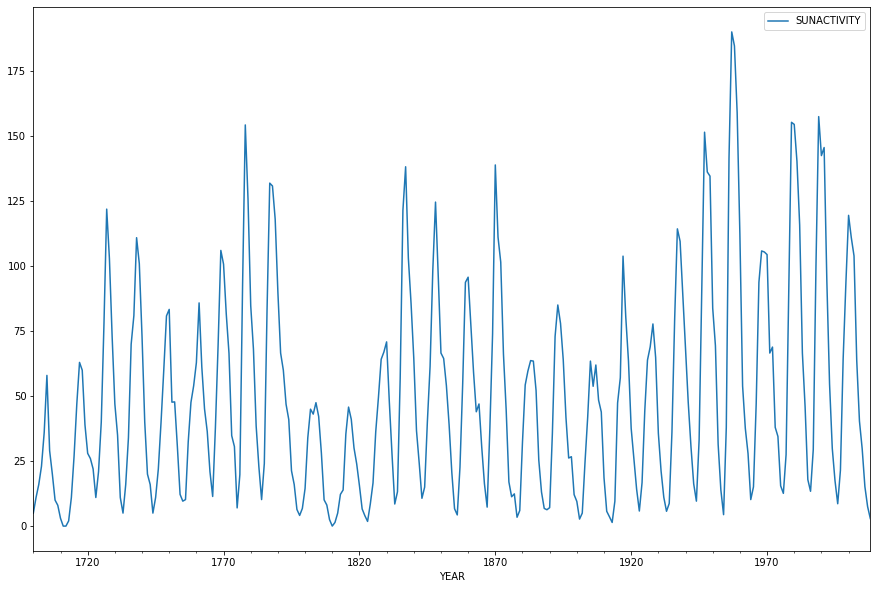

In [76]:
y.plot(figsize=(15,10))
plt.show()

In [80]:
y_new = y['1950':]
#y_new.head()

In [38]:
import numpy as np

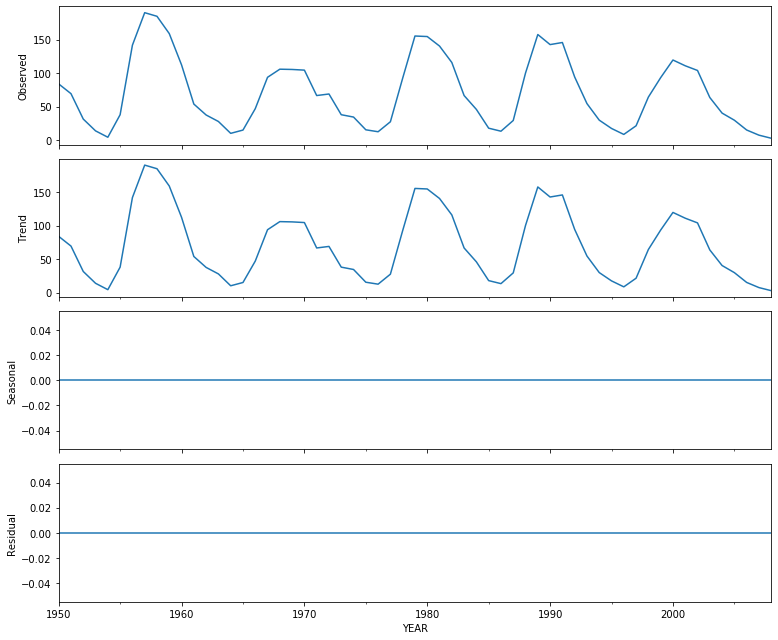

In [81]:
# decompose the series
decom = sm.tsa.seasonal_decompose(y_new,model='additive')
fig = decom.plot()
plt.show()